# Экспорт

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
from IPython.display import display

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Используем засечковый шрифт
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"""
        \usepackage[utf8]{inputenc}
        \usepackage[russian]{babel}
        \usepackage[T2A]{fontenc}
    """,
    "pgf.texsystem": "xelatex"
})

def calculate_r2(x, y):
    
    popt, pcov = curve_fit(lambda x,k,b: k*x+b, x,y)

    y_true = y 
    y_pred = popt[0]*x + popt[1]

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

# Обработка


In [4]:
df = pd.DataFrame({})

df["phi12"] = np.linspace(0,1,11)
df["T"] = [
    [81,81],
    [71.5,71],
    [69.5,69.5],
    [69.0,69.25],
    [69.0,69.25],
    [69.5,70],
    [70.75,71], 
    [72.25, 72.25],
    [74.5,75.5],
    [78,78.75],
    [82,82]]
df[["T1", "T2"]] = pd.DataFrame(df["T"].tolist(), index=df.index)
df.drop("T", axis=1, inplace=True)
df["T"] = 0.5 * (df.T1 + df.T2)


df["n1"] = [1.4230, 1.4170, 1.4060, 1.4060, 1.4010, 1.3945, 1.3930, 1.3850, 1.3815, 1.3760, 1.3745]
df["n2"] = [1.4215, 1.4060, 1.4035, 1.4035, 1.4025, 1.4020, 1.4005, 1.3975, 1.3925, 1.3865, 1.3745]

M1 = 60.0950 # i-Pr-Oh
M2 = 84.1595 # C6H12

d2 = 785.1
d1 = 778.6



a =  1/ (M1/M2 * d2/d1 * 1/df.phi12 + (1 - M1/M2 * d2/d1))
df.insert(1, "xi12", a)
df.xi12 = np.round(df.xi12,4)


display(df)

,phi12,xi12,T1,T2,T,n1,n2
0,0.0,0.0000,81.00,81.00,81.000,1.4230,1.4215
1,0.1,0.1337,71.50,71.00,71.250,1.4170,1.4060
2,0.2,0.2577,69.50,69.50,69.500,1.4060,1.4035
3,0.3,0.3731,69.00,69.25,69.125,1.4060,1.4035
4,0.4,0.4808,69.00,69.25,69.125,1.4010,1.4025
5,0.5,0.5814,69.50,70.00,69.750,1.3945,1.4020
6,0.6,0.6757,70.75,71.00,70.875,1.3930,1.4005
7,0.7,0.7642,72.25,72.25,72.250,1.3850,1.3975
8,0.8,0.8475,74.50,75.50,75.000,1.3815,1.3925
9,0.9,0.9259,78.00,78.75,78.375,1.3760,1.3865


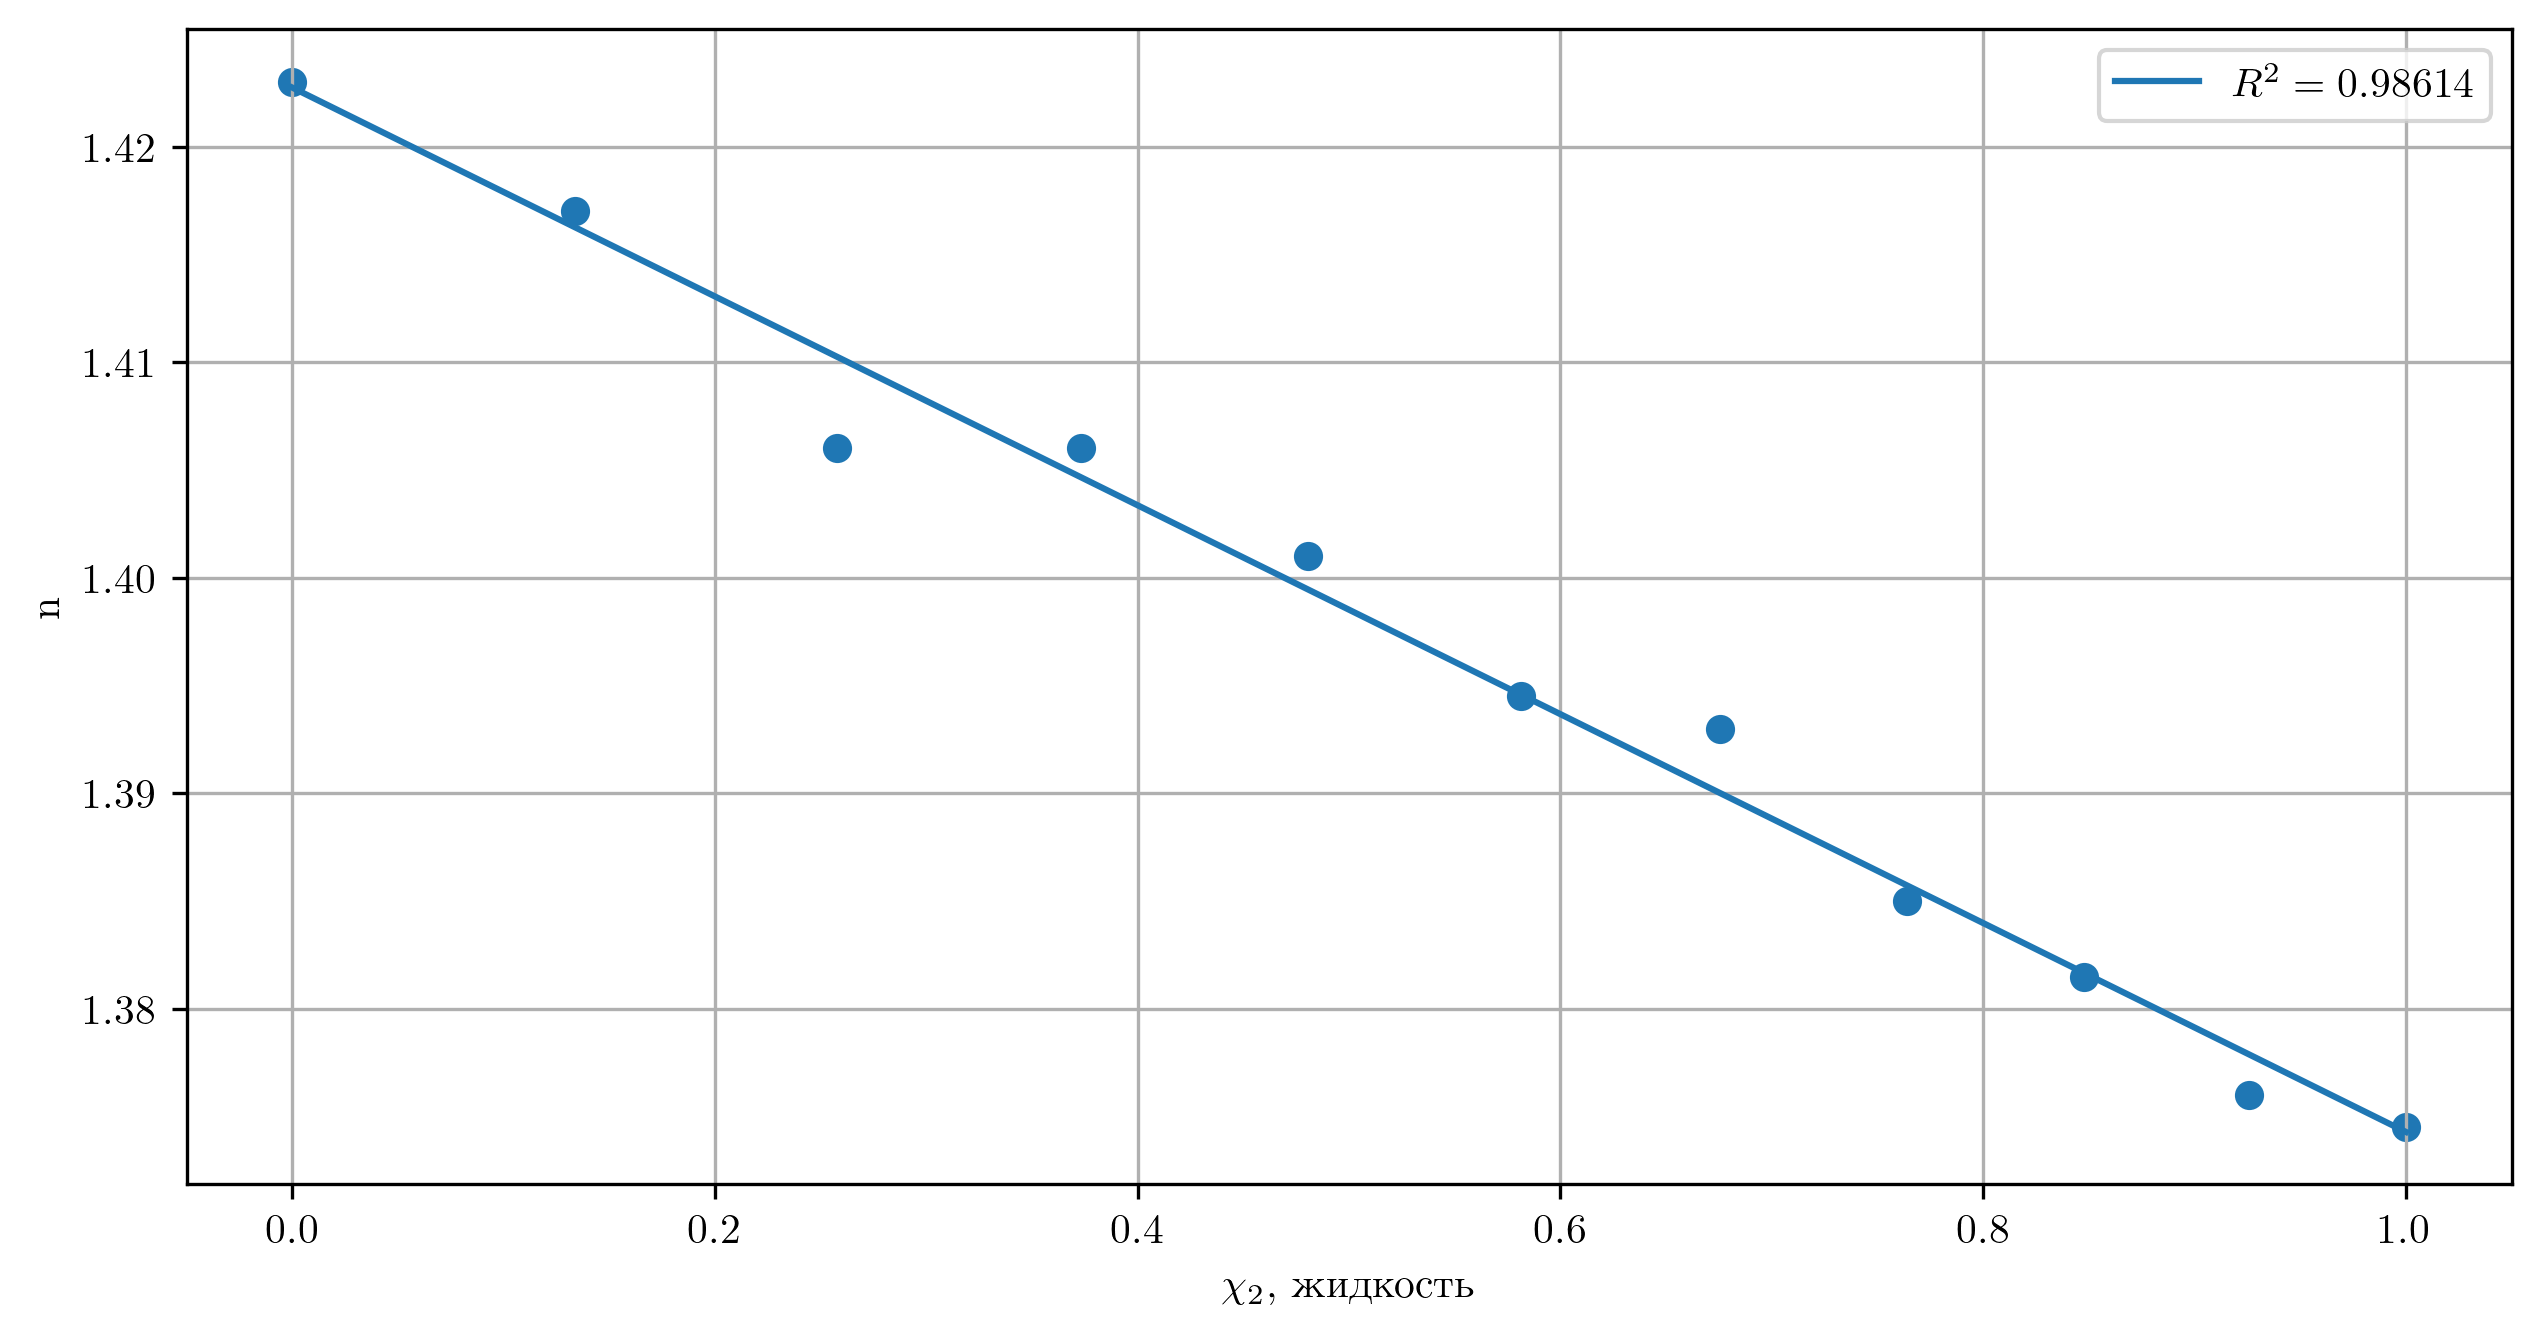

In [5]:
ax = plt.figure(figsize=(10,5), dpi =300)

popt, pcov = curve_fit(lambda x, k, b: k*x + b, df.xi12, df.n1)

plt.scatter(df.xi12, df.n1)
r2 = calculate_r2(df.xi12, df.n1)
plt.plot(df.xi12, df.xi12*popt[0] + popt[1], label = f"$R^{{2}} = {r2:.5f}$")  


plt.xlabel("$\\chi_2$, жидкость")
plt.ylabel("n")
plt.grid()
plt.legend()
plt.savefig("images/зависимость коэффициента преломленияот состава смеси")

,phi12,xi12,T1,T2,T,n1,n2,xi22
0,0.0,0.0000,81.00,81.00,81.000,1.4230,1.4215,0.0255
1,0.1,0.1337,71.50,71.00,71.250,1.4170,1.4060,0.3455
2,0.2,0.2577,69.50,69.50,69.500,1.4060,1.4035,0.3971
3,0.3,0.3731,69.00,69.25,69.125,1.4060,1.4035,0.3971
4,0.4,0.4808,69.00,69.25,69.125,1.4010,1.4025,0.4177
5,0.5,0.5814,69.50,70.00,69.750,1.3945,1.4020,0.4281
6,0.6,0.6757,70.75,71.00,70.875,1.3930,1.4005,0.4590
7,0.7,0.7642,72.25,72.25,72.250,1.3850,1.3975,0.5209
8,0.8,0.8475,74.50,75.50,75.000,1.3815,1.3925,0.6242
9,0.9,0.9259,78.00,78.75,78.375,1.3760,1.3865,0.7480


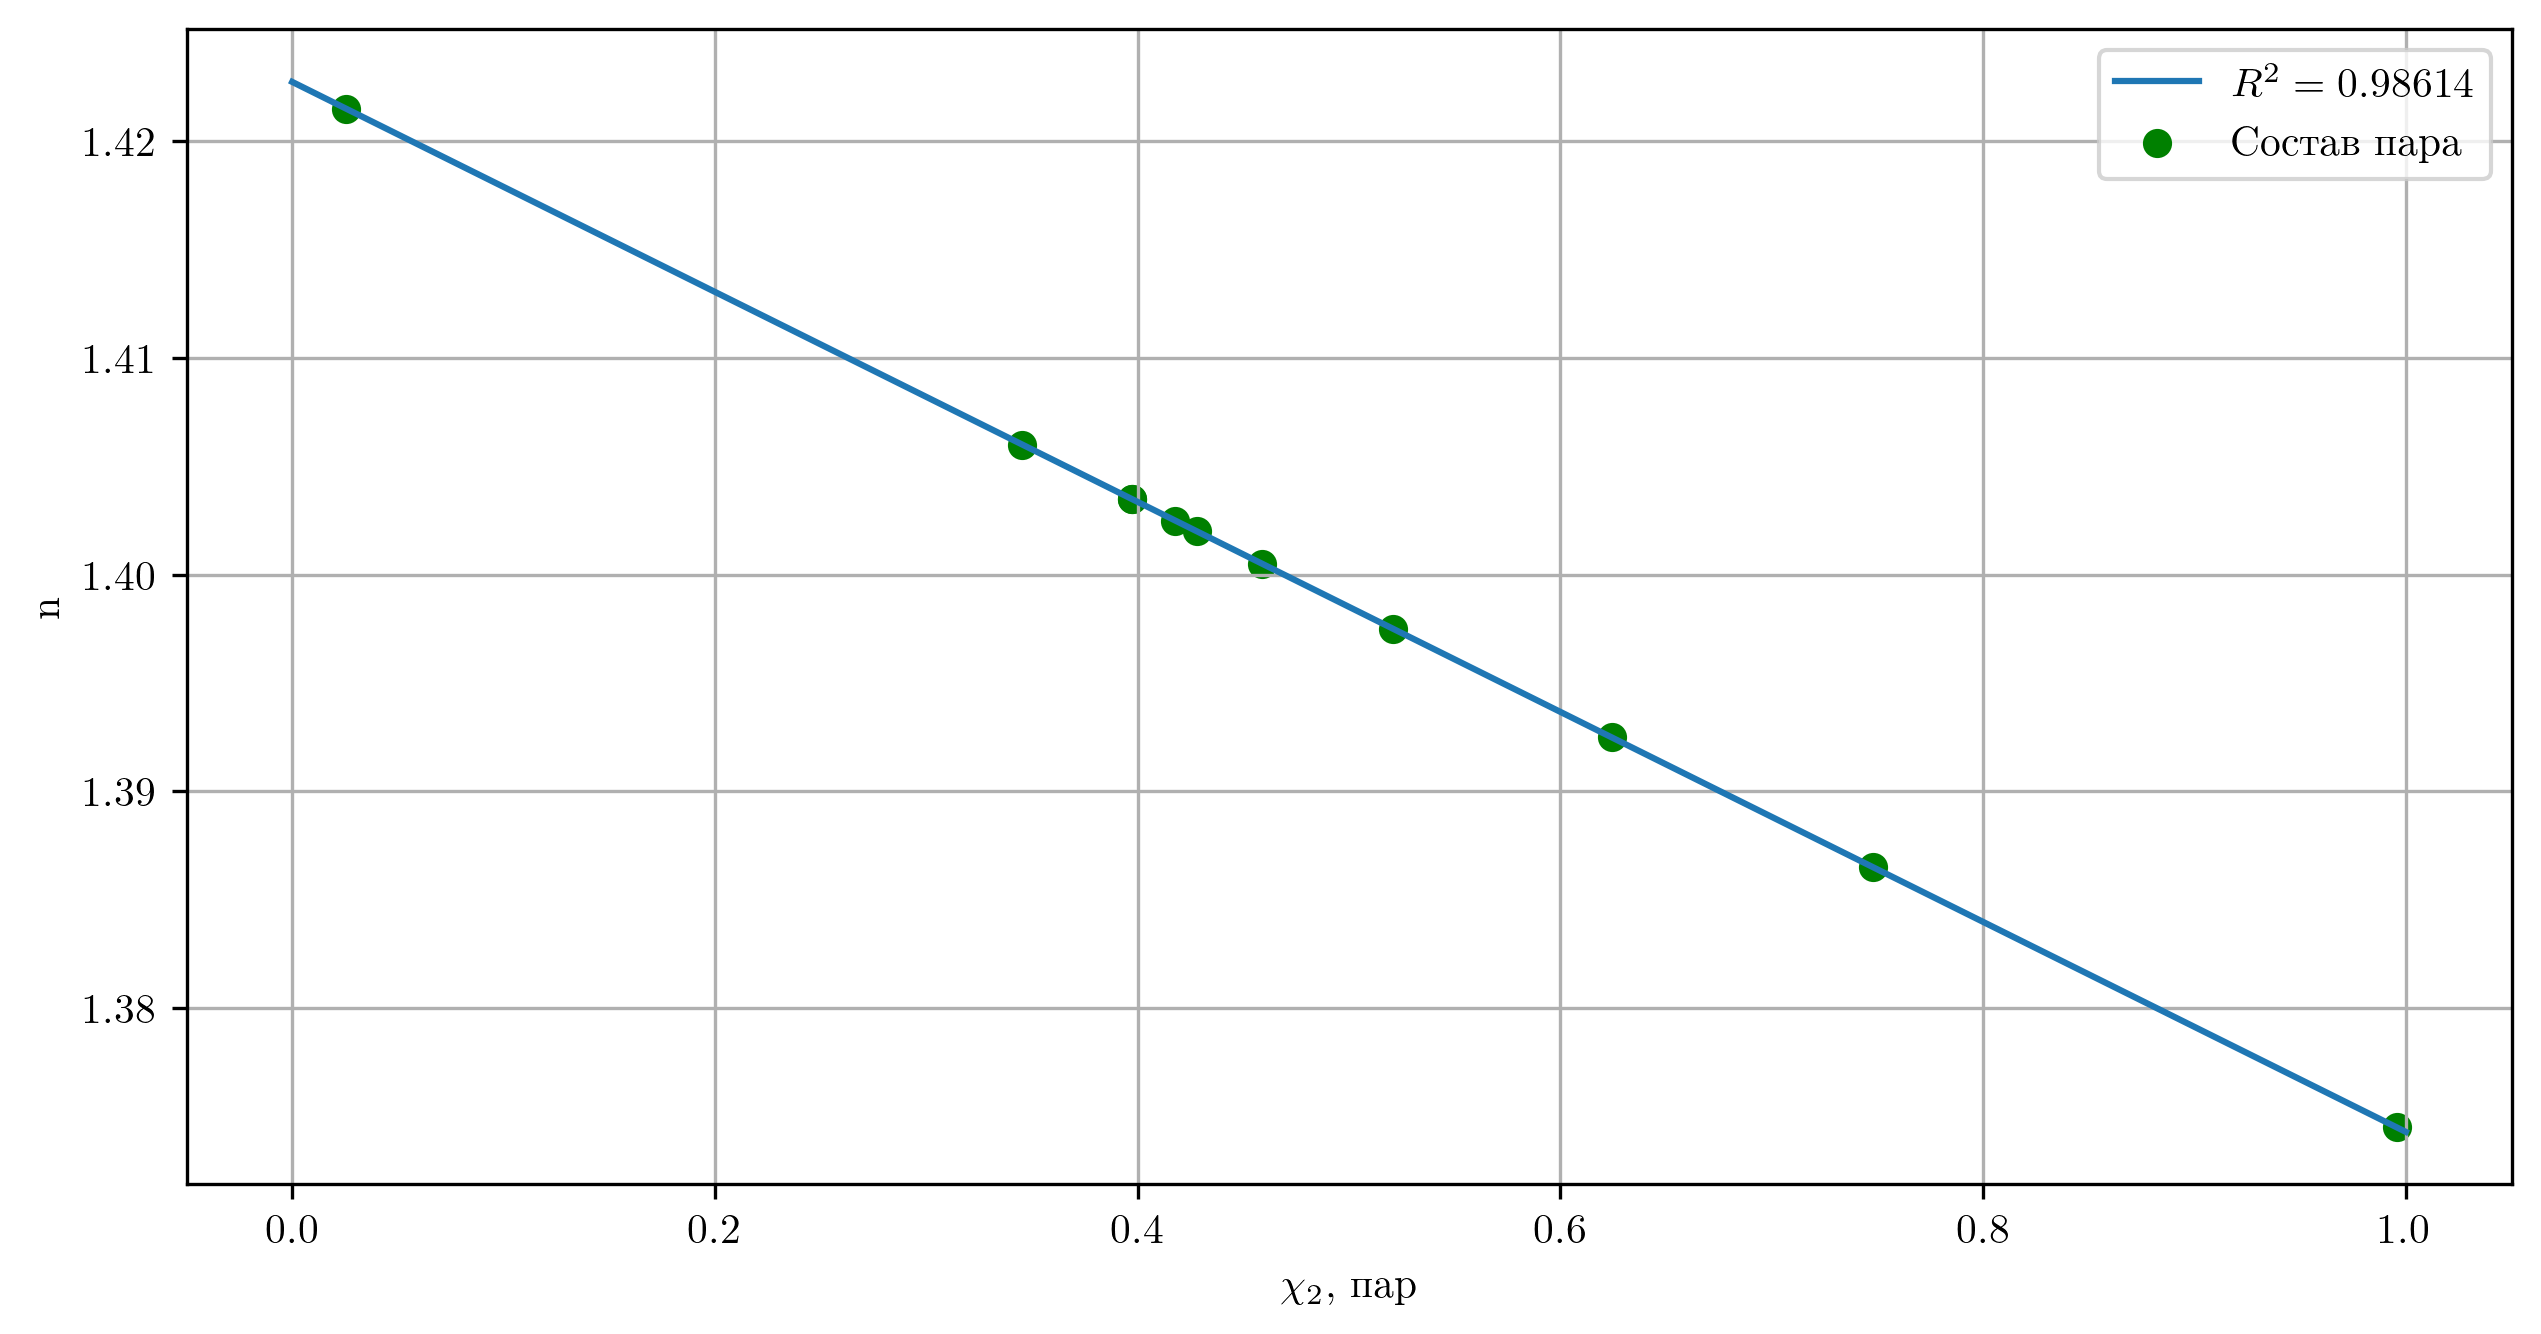

In [6]:
ax = plt.figure(figsize=(10,5), dpi =300)

popt, pcov = curve_fit(lambda x, k, b: k*x + b, df.xi12, df.n1)

r2 = calculate_r2(df.xi12, df.n1)
plt.plot(df.xi12, df.xi12*popt[0] + popt[1], label = f"$R^{{2}} = {r2:.5f}$")  

df["xi22"] = np.round((df.n2 - popt[1]) / popt[0], 4)

plt.scatter(df.xi22,df.n2, color = "g", label = "Состав пара")

plt.xlabel("$\\chi_2$, пар")
plt.ylabel("n")
plt.grid()
plt.legend()
plt.savefig("images/зависимость коэффициента преломленияот состава пара")
display(df)

In [7]:
df2 = pd.DataFrame({})

df2["xi1"] = np.round(df.xi12,4)
df2["xi2"] = 1 - df.xi12
df2["y1"]  = np.round(df.xi22, 4)
df2["y2"]  = np.round(1 - df.xi22,4)
df2["T"]   = df["T"]

P = lambda x, A, B, C: np.round(10**(A - B / (x + C)),4)
p = 1

df2["p1s"] = P(df2["T"] + 273.15, 4.8610, 1357.427, -75.814)
df2["p2s"] = P(df2["T"] + 273.15, 3.17125, 780.637, -107.29)

df2["g1"]  = np.round(df2.y1 * p / (df2.xi1 * df2.p1s),4)
df2["g2"]  = np.round(df2.y2 * p / (df2.xi2 * df2.p2s),4)

display(df2)

,xi1,xi2,y1,y2,T,p1s,p2s,g1,g2
0,0.0000,1.0000,0.0255,0.9745,81.000,0.9640,1.0209,inf,0.9545
1,0.1337,0.8663,0.3455,0.6545,71.250,0.6412,0.7567,4.0302,0.9984
2,0.2577,0.7423,0.3971,0.6029,69.500,0.5941,0.7153,2.5937,1.1355
3,0.3731,0.6269,0.3971,0.6029,69.125,0.5844,0.7066,1.8212,1.3610
4,0.4808,0.5192,0.4177,0.5823,69.125,0.5844,0.7066,1.4866,1.5872
5,0.5814,0.4186,0.4281,0.5719,69.750,0.6007,0.7211,1.2258,1.8946
6,0.6757,0.3243,0.4590,0.5410,70.875,0.6309,0.7477,1.0767,2.2311
7,0.7642,0.2358,0.5209,0.4791,72.250,0.6695,0.7812,1.0181,2.6009
8,0.8475,0.1525,0.6242,0.3758,75.000,0.7527,0.8515,0.9785,2.8940
9,0.9259,0.0741,0.7480,0.2520,78.375,0.8662,0.9441,0.9327,3.6022


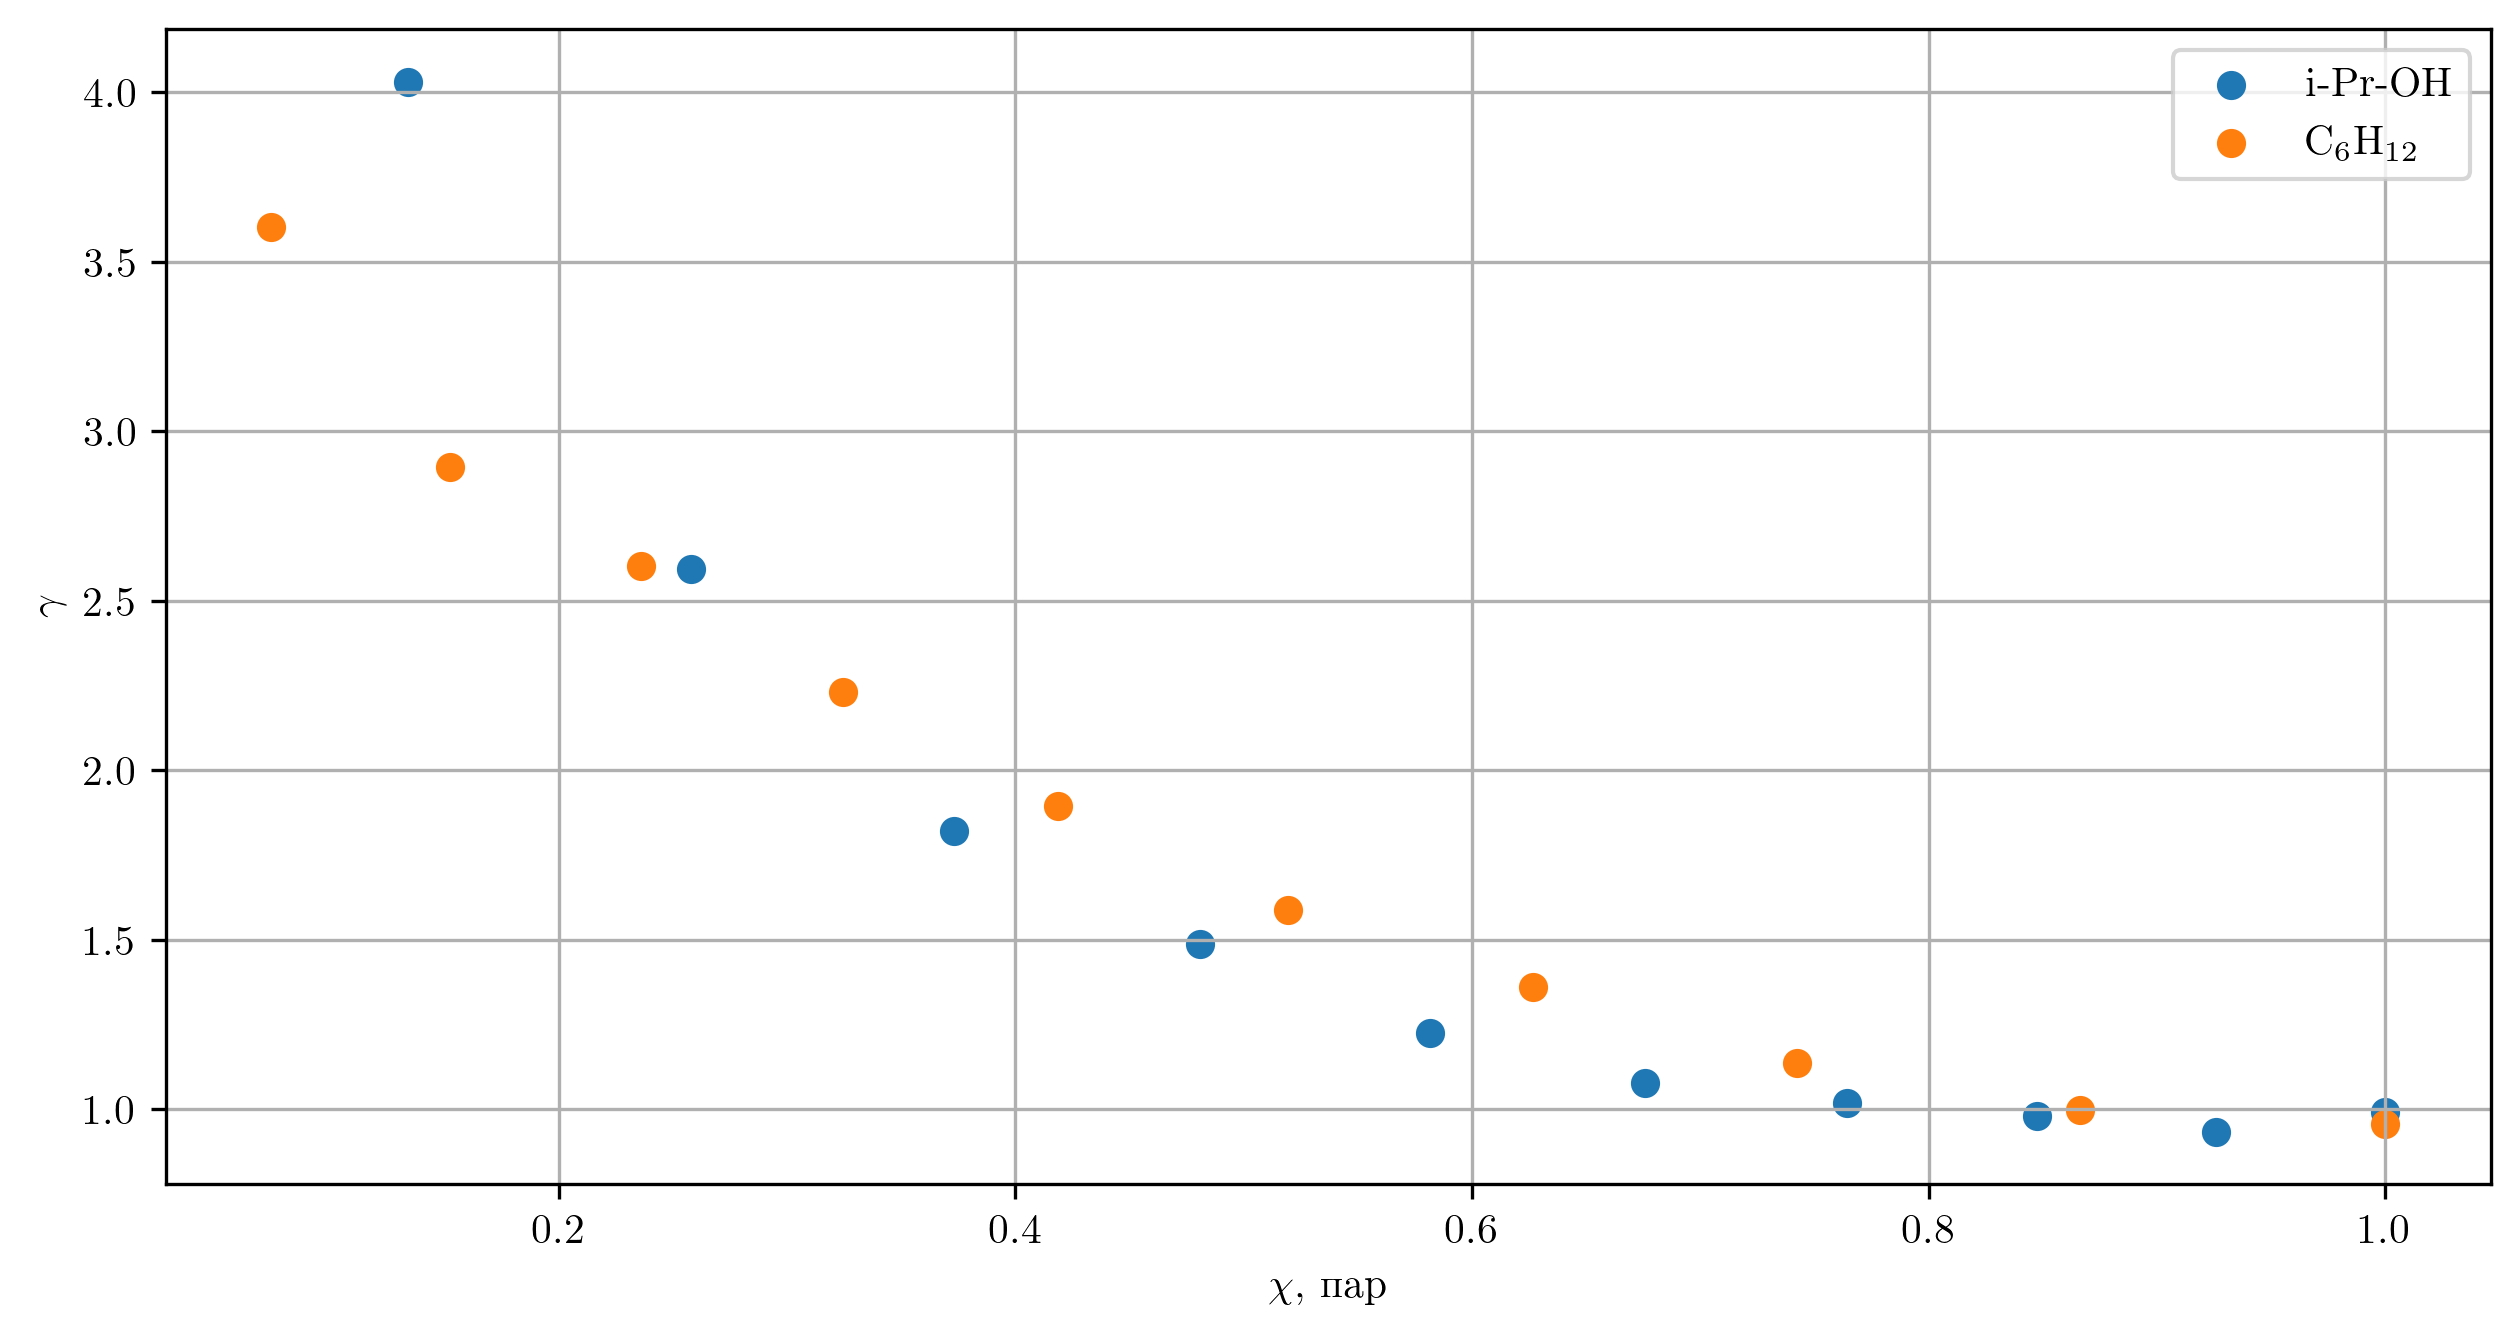

In [8]:
ax = plt.figure(figsize=(10,5), dpi =300)


plt.scatter(df2.xi1,df2.g1, label= "i-Pr-OH")
plt.scatter(df2.xi2,df2.g2, label= "C$_6$H$_{12}$")


plt.xlabel("$\\chi$, пар")
plt.ylabel("$\\gamma$")
plt.grid()
plt.legend()
plt.savefig("images/Зависимость коээффицента активность от температуры")

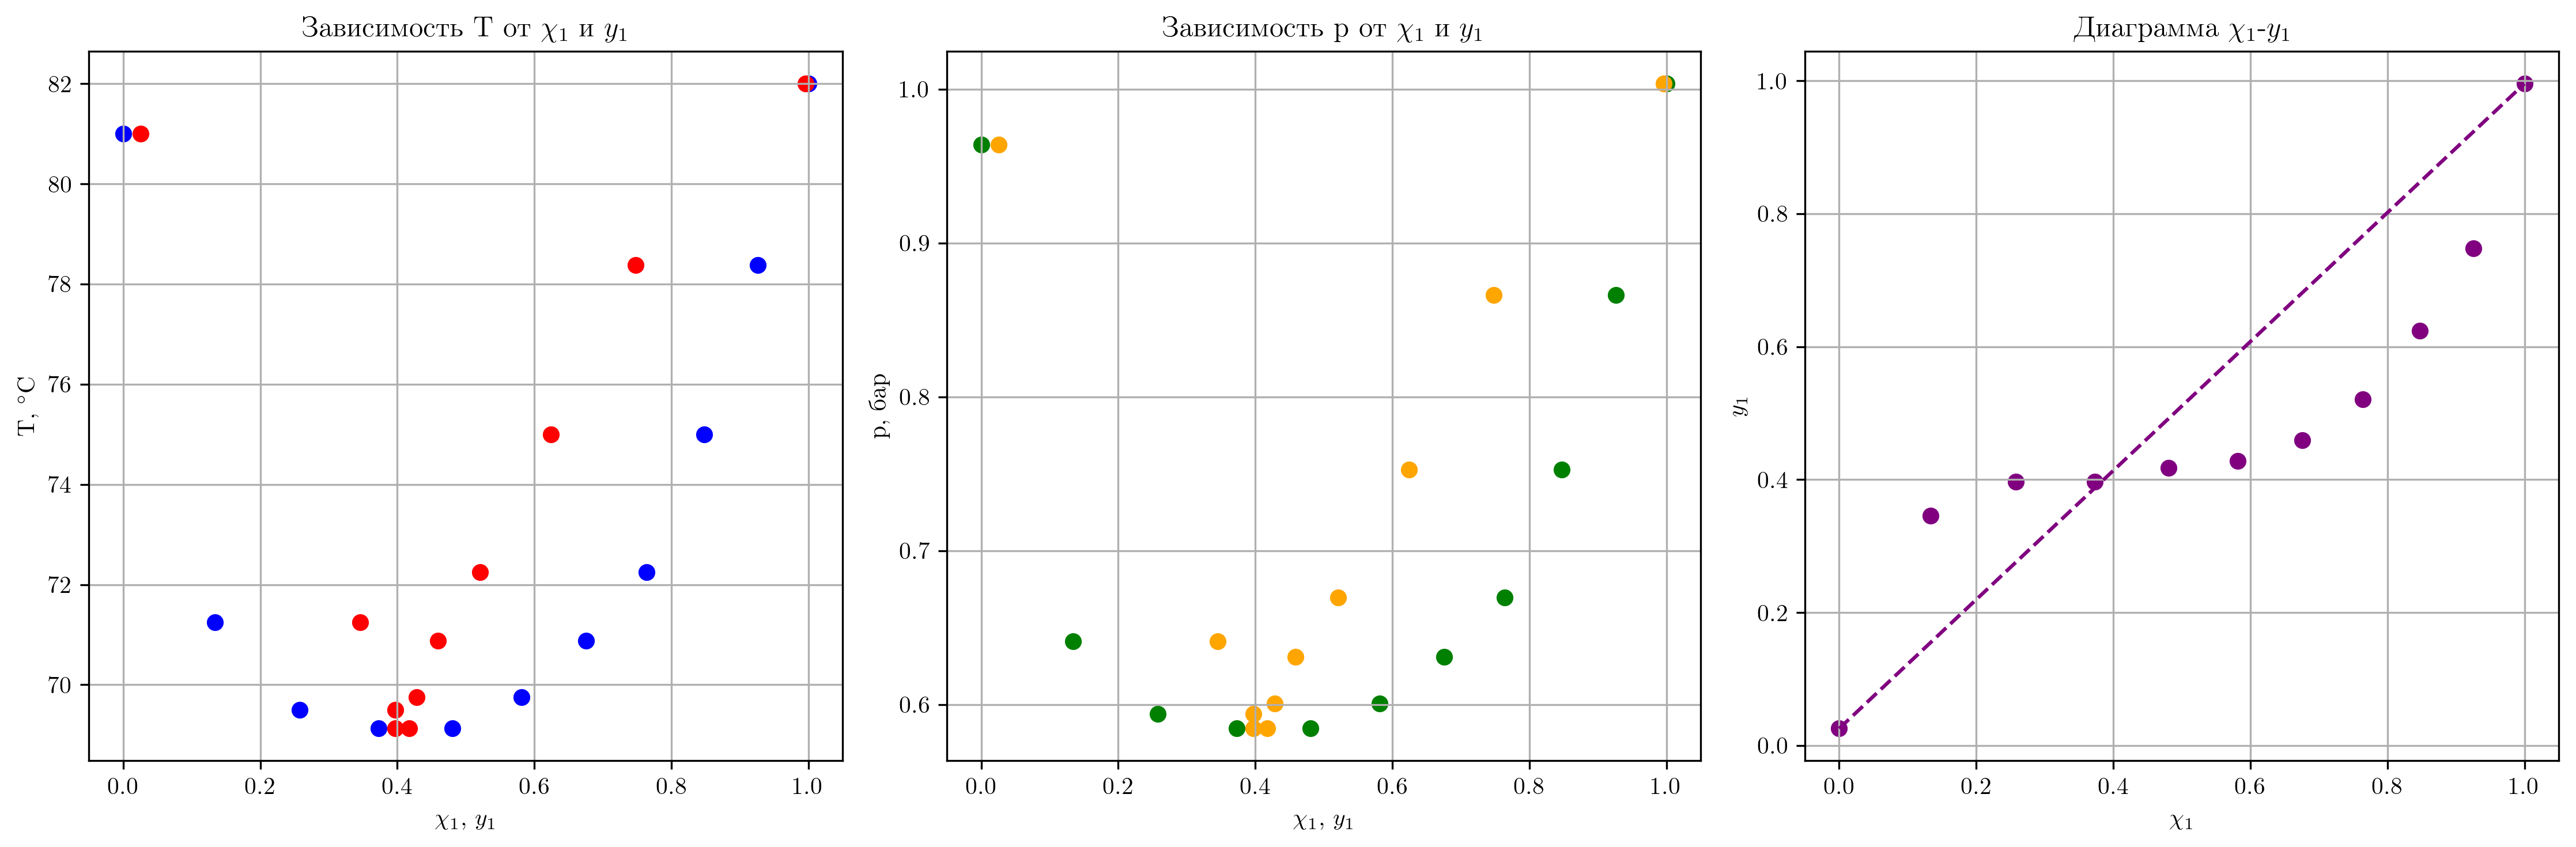

In [9]:
df3 = pd.DataFrame({})

df3["xi"] = df2.xi1
df3["y"] = df2.y1

df3["p"] = df2.p1s
df3["t"] = df2["T"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi = 300)

axes[0].scatter(df3.xi, df3.t, color='blue')
axes[0].scatter(df3.y, df3.t, color='red')
axes[0].set_xlabel('$\\chi_1$, $y_1$')
axes[0].set_ylabel('T, $^\\circ$C')
axes[0].set_title('Зависимость T от $\\chi_1$ и $y_1$')


axes[1].scatter(df3.xi, df3.p, color='green')
axes[1].scatter(df3.y, df3.p, color='orange')
axes[1].set_xlabel('$\\chi_1$, $y_1$')
axes[1].set_ylabel('p, бар')
axes[1].set_title('Зависимость p от $\\chi_1$ и $y_1$')


axes[2].scatter(df3.xi, df3.y, color='purple')
axes[2].plot((df3.xi[0],df3.xi[10]),
             (df3.y[0],df3.y[10]),"--", color='purple')
axes[2].set_xlabel('$\\chi_1$')
axes[2].set_ylabel('$y_1$')
axes[2].set_title('Диаграмма $\\chi_1$-$y_1$')

plt.tight_layout()

for i in range(3):
    axes[i].grid()

plt.savefig("images/Фазовые диаграммы.png")

plt.show()

# Запринтуем таблицы

In [10]:
print(tabulate(df, tablefmt="github"))

|----|-----|--------|-------|-------|--------|--------|--------|--------|
|  0 | 0   | 0      | 81    | 81    | 81     | 1.423  | 1.4215 | 0.0255 |
|  1 | 0.1 | 0.1337 | 71.5  | 71    | 71.25  | 1.417  | 1.406  | 0.3455 |
|  2 | 0.2 | 0.2577 | 69.5  | 69.5  | 69.5   | 1.406  | 1.4035 | 0.3971 |
|  3 | 0.3 | 0.3731 | 69    | 69.25 | 69.125 | 1.406  | 1.4035 | 0.3971 |
|  4 | 0.4 | 0.4808 | 69    | 69.25 | 69.125 | 1.401  | 1.4025 | 0.4177 |
|  5 | 0.5 | 0.5814 | 69.5  | 70    | 69.75  | 1.3945 | 1.402  | 0.4281 |
|  6 | 0.6 | 0.6757 | 70.75 | 71    | 70.875 | 1.393  | 1.4005 | 0.459  |
|  7 | 0.7 | 0.7642 | 72.25 | 72.25 | 72.25  | 1.385  | 1.3975 | 0.5209 |
|  8 | 0.8 | 0.8475 | 74.5  | 75.5  | 75     | 1.3815 | 1.3925 | 0.6242 |
|  9 | 0.9 | 0.9259 | 78    | 78.75 | 78.375 | 1.376  | 1.3865 | 0.748  |
| 10 | 1   | 1      | 82    | 82    | 82     | 1.3745 | 1.3745 | 0.9957 |


In [11]:
print(tabulate(df2, tablefmt="github"))

|----|--------|--------|--------|--------|--------|--------|--------|----------|----------|
|  0 | 0      | 1      | 0.0255 | 0.9745 | 81     | 0.964  | 1.0209 | inf      |   0.9545 |
|  1 | 0.1337 | 0.8663 | 0.3455 | 0.6545 | 71.25  | 0.6412 | 0.7567 |   4.0302 |   0.9984 |
|  2 | 0.2577 | 0.7423 | 0.3971 | 0.6029 | 69.5   | 0.5941 | 0.7153 |   2.5937 |   1.1355 |
|  3 | 0.3731 | 0.6269 | 0.3971 | 0.6029 | 69.125 | 0.5844 | 0.7066 |   1.8212 |   1.361  |
|  4 | 0.4808 | 0.5192 | 0.4177 | 0.5823 | 69.125 | 0.5844 | 0.7066 |   1.4866 |   1.5872 |
|  5 | 0.5814 | 0.4186 | 0.4281 | 0.5719 | 69.75  | 0.6007 | 0.7211 |   1.2258 |   1.8946 |
|  6 | 0.6757 | 0.3243 | 0.459  | 0.541  | 70.875 | 0.6309 | 0.7477 |   1.0767 |   2.2311 |
|  7 | 0.7642 | 0.2358 | 0.5209 | 0.4791 | 72.25  | 0.6695 | 0.7812 |   1.0181 |   2.6009 |
|  8 | 0.8475 | 0.1525 | 0.6242 | 0.3758 | 75     | 0.7527 | 0.8515 |   0.9785 |   2.894  |
|  9 | 0.9259 | 0.0741 | 0.748  | 0.252  | 78.375 | 0.8662 | 0.9441 |   0.9327 |